In [2]:
from matplotlib import pyplot as plt
import numpy as np
import nbodykit
%matplotlib inline

from nbodykit.lab import *
from nbodykit import style, setup_logging
plt.style.use('Notebook.mystyle')

# Set the redshift
redshift = 1.9
# Set the cosmology
cosmo = cosmology.Planck15

In [3]:
def generate_lognormal_mock(nbar=3e-3, BoxSize=1000, Nmesh=256, bias=2, seed=4):
    """Generate mock lognormal catalog"""
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
    b1 = 2.0
    # Catalog holds the list of particles that are samples from the lognorrmal field
    cat = LogNormalCatalog(Plin=Plin, nbar=nbar, BoxSize=BoxSize, Nmesh=Nmesh, bias=bias, seed=seed)

    return cat

Here is the doc for coordinate transformations: https://nbodykit.readthedocs.io/en/latest/api/_autosummary/nbodykit.transform.html?highlight=nbodykit.transform#nbodykit.transform.CartesianToEquatorial

In [4]:
from nbodykit.transform import CartesianToSky

boxsize=1000
cat = generate_lognormal_mock(nbar=3e-3, BoxSize=boxsize, Nmesh=256, bias=2, seed=4)

# Place the observer at z= 0 and at midpoint of the box along 0, 1 axes. 
observer = [boxsize/2, boxsize/2, -cosmo.comoving_distance(1.9)]
coords = CartesianToSky(pos = cat['Position'], observer=observer, cosmo = cosmo)
print(np.min(coords.compute()[2,:]), np.max(coords.compute()[2,:]))



1.9003271298546809 3.218547958786192


`Coords` is `(3, # of particles)` that holds the particles coordinates, the first column is RA, the second Dec and the 3rd is redshift.

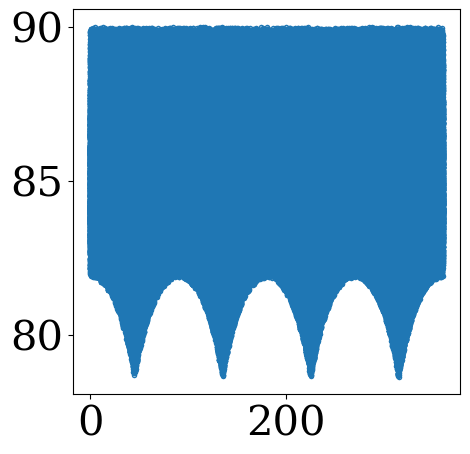

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(coords[0,:], coords[1,:], s=1)

The box is big, do you can place RA and Dec cuts to mimick HETDEX.